<a href="https://colab.research.google.com/github/vinaykumar007/100-Days-Of-ML-Code/blob/master/Assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [ ]:
aTuple = (1, 2, 3)
aList = list(aTuple)

In [ ]:
aList

[1, 2, 3]

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
boston_df = pd.read_csv('housing.csv')


# Display first few rows of the dataframe
print(boston_df.head())

# Display basic statistics about the dataset
print(boston_df.describe())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

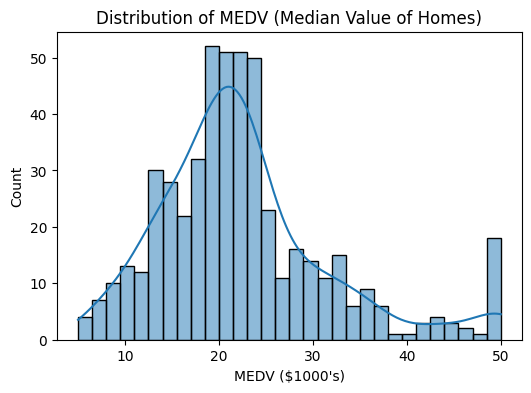

In [6]:
# Distribution of the target variable (MEDV)
plt.figure(figsize=(6,4))
sns.histplot(boston_df['MEDV'], kde=True, bins=30)
plt.title("Distribution of MEDV (Median Value of Homes)")
plt.xlabel("MEDV ($1000's)")
plt.show()


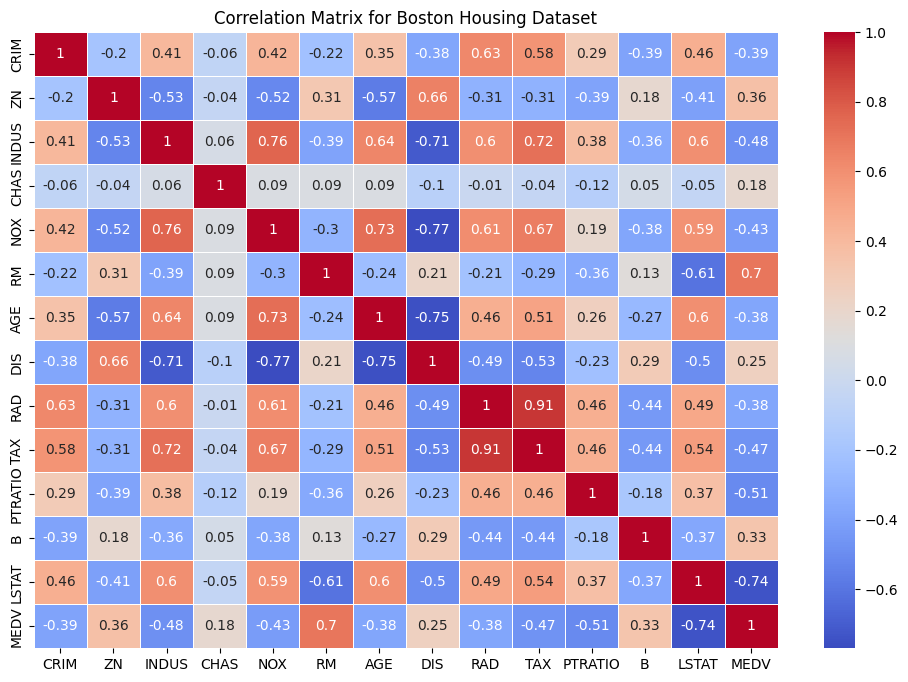

In [7]:
# Correlation matrix heatmap
plt.figure(figsize=(12,8))
correlation_matrix = boston_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Boston Housing Dataset")
plt.show()


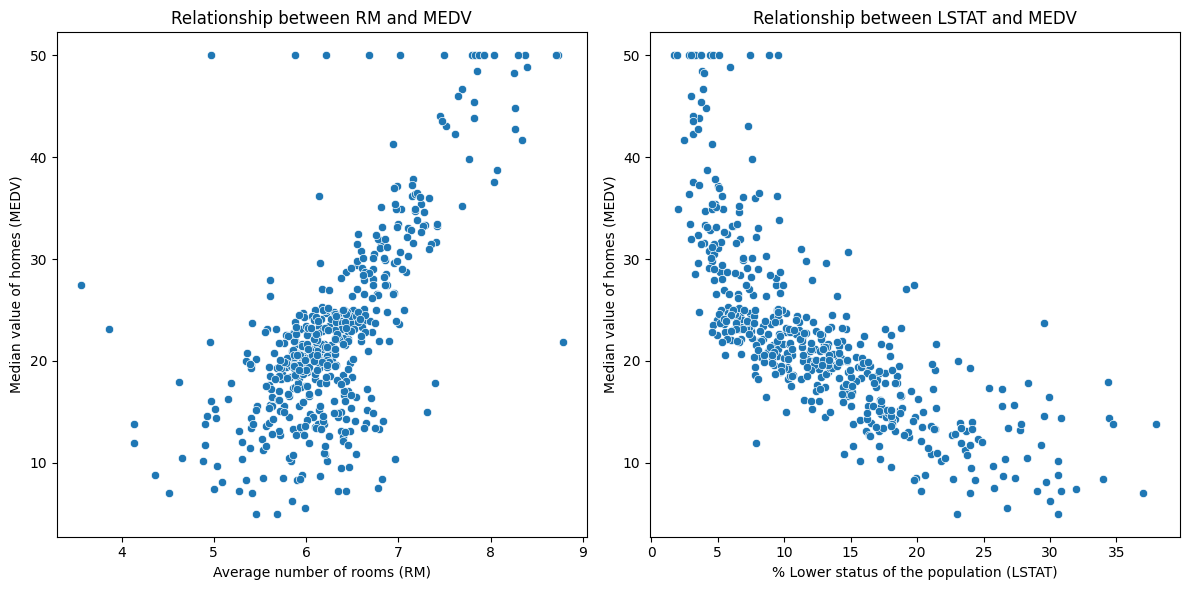

In [8]:


# Scatter plots for selected features
plt.figure(figsize=(12, 6))

# Rooms vs. Median value
plt.subplot(1, 2, 1)
sns.scatterplot(x=boston_df['RM'], y=boston_df['MEDV'])
plt.title("Relationship between RM and MEDV")
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Median value of homes (MEDV)")

# LSTAT vs. Median value
plt.subplot(1, 2, 2)
sns.scatterplot(x=boston_df['LSTAT'], y=boston_df['MEDV'])
plt.title("Relationship between LSTAT and MEDV")
plt.xlabel("% Lower status of the population (LSTAT)")
plt.ylabel("Median value of homes (MEDV)")

plt.tight_layout()
plt.show()


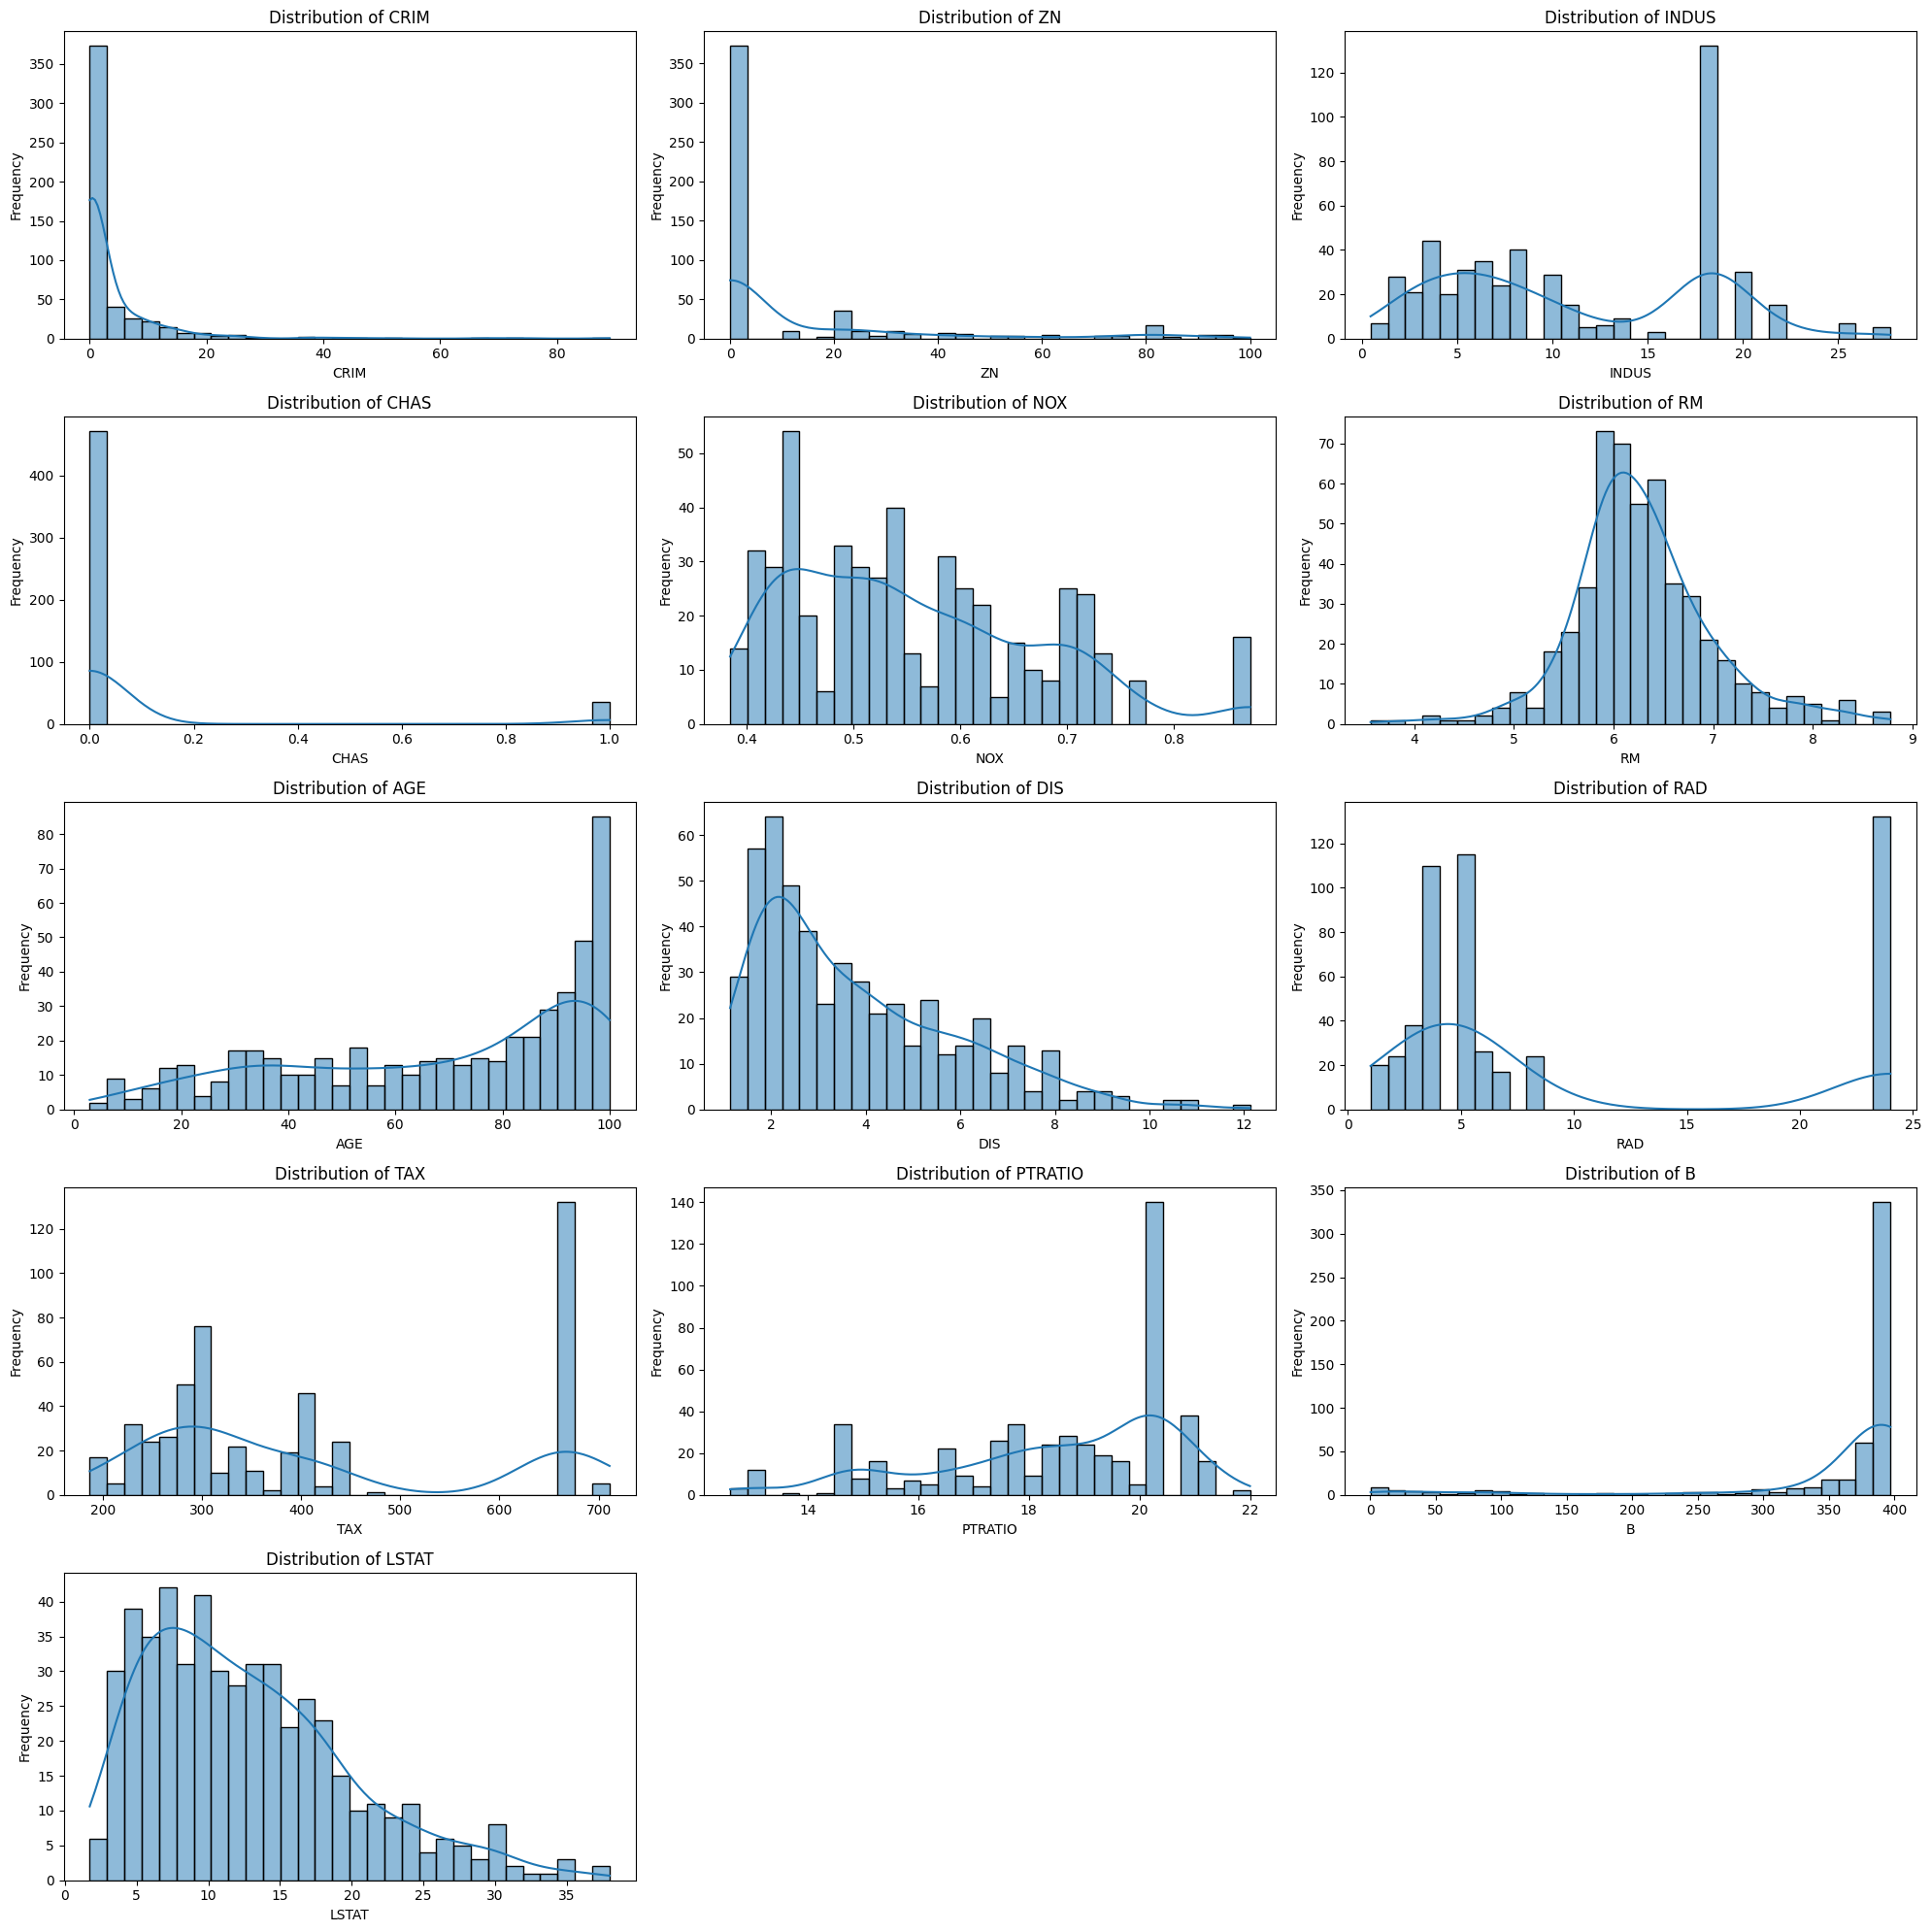

In [10]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from housing.csv
boston_df = pd.read_csv('housing.csv')

# Get the list of independent variables (excluding the target variable 'MEDV')
independent_vars = boston_df.columns[:-1]  # Exclude the target variable 'MEDV'

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Loop over the independent variables and create a subplot for each
for i, var in enumerate(independent_vars):
    plt.subplot(5, 3, i + 1)  # 5 rows and 3 columns for 13 features
    sns.histplot(boston_df[var], kde=True, bins=30)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()


In [11]:
# Split the data into independent variables (X) and the dependent variable (y)
X = boston_df.drop(columns=['MEDV'])
y = boston_df['MEDV']

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model on training and test data
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}")


Training MSE: 21.641412753226312
Test MSE: 24.291119474973478
Training R2 Score: 0.7508856358979673
Test R2 Score: 0.6687594935356326
